In [3]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report
from pyod.models.iforest import IForest
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection
import os
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

In [4]:

#일반 데이터
df = pd.read_csv('data/preprocessed.csv')
X = df.drop('stroke',axis=1)
y = df['stroke']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

#Oversampling by Smote
overs = SMOTE(random_state=1)
X_os, y_os = overs.fit_resample(X,y)
X_os_train,X_os_test,y_os_train,y_os_test = train_test_split(X_os,y_os,test_size=0.3,random_state=1)

#Undersampling by OSS
unders = OneSidedSelection(n_neighbors=1, n_seeds_S=1)
X_us,y_us = unders.fit_resample(X,y)
X_us_train,X_us_test,y_us_train,y_us_test = train_test_split(X_us,y_us,test_size=0.3,random_state=1)


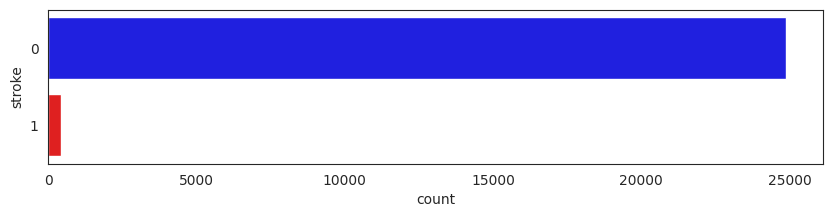

In [5]:
plt.figure(figsize=(10,2))
fig = sns.countplot(y=df['stroke'], data=df, palette=['blue', 'red'])
plt.show()

In [9]:
df_stroke_0 = df[df['stroke'] == 0]
df_stroke_1 = df[df['stroke'] == 1]
print(len(df_stroke_0))
print(len(df_stroke_1))


24890
420


In [12]:
#정상 데이터의 420개 랜덤 샘플링
test_normal_df = df_stroke_0.sample(n=420, random_state = 0)
test_normal_df

,Unnamed: 0,ever_married,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
17430,20762,1,0,70.0,0,0,91.83,30.9,0,0,0,1,0,0,0,1,0
12614,15019,1,1,56.0,0,0,74.28,40.2,0,0,0,1,0,0,0,1,0
19834,23618,1,0,74.0,0,0,64.29,17.6,0,0,0,0,1,0,1,0,0
22411,26675,0,0,26.0,0,0,115.10,39.3,0,0,0,1,0,0,0,1,0
9452,11294,1,1,66.0,0,0,74.46,28.9,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9367,11198,1,1,50.0,0,0,90.41,27.4,0,0,0,0,1,0,0,0,1
10188,12178,1,0,80.0,0,1,61.41,17.2,0,0,0,1,0,0,0,1,0
24319,28917,1,0,30.0,0,0,85.96,26.1,0,0,0,1,0,0,0,1,0
5128,6121,1,0,48.0,0,0,89.88,26.0,0,0,0,0,1,0,0,0,1


In [13]:
# 정상 데이터 420개 + 이상 데이터 420개 concat 하여 test 데이터셋 생성
test_df = pd.concat([df_stroke_1, test_normal_df])

# test 데이터셋 => X_test, y_test 분할
X_test = test_df[test_df.columns.difference(['stroke'])]
y_test = test_df["stroke"]

print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X_test: (840, 16) y_test: (840,)


In [14]:
# 나머지 정상 데이터로 train 데이터셋 생성
train_df = df_stroke_0.drop(test_normal_df.index)

# train 데이터 셋 => X_train, y_train 분할
X_train = train_df[train_df.columns.difference(['storke'])]
y_train = train_df["stroke"]

print('X_train:', X_train.shape, 'y_train:', y_train.shape)

X_train: (24470, 17) y_train: (24470,)


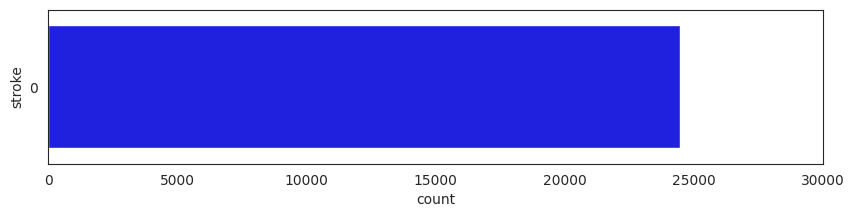

In [17]:
# train 데이터셋은 정상 데이터로만 구성
plt.figure(figsize=(10,2))
fig = sns.countplot(y=train_df['stroke'], data=train_df, palette=["blue"])
plt.xlim(0, 30000)
plt.show()

In [ ]:
# test dataset은 정상과 이상 일대일 비율로 구성
plt.figure(figsize=(10,2))
fig = sns.countplot(y=test_df['stroke'], data=test_df, palette=["blue", "red"])
plt.xlim(0, 1000)
plt.show()